In [1]:
import pandas as pd
import numpy as np

In [50]:
import matplotlib.pyplot as plt
import pdb

In [47]:
resultWOEV=pd.read_csv("resultWOEV.csv")
resultEV75=pd.read_csv("resultEV75.csv")
resultEV50=pd.read_csv("resultEV50.csv")
demand= pd.read_csv('CAISODemand2015.csv')

In [51]:
# get date_time back as index
demand18=demand.iloc[21935:]
demand18=demand18[:-5832]
demand18['date']=demand18['date_time'].str.slice(start=0,stop=8)
demand18['time']=demand18['date_time'].str.slice(start=9,stop=11)
resultWOEV.index=demand18['date']+demand18['time']
resultEV75.index=demand18['date']+demand18['time']
resultEV50.index=demand18['date']+demand18['time']

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,35,36,37,38,39,MCP,system_cost,supply,demand,customer_cost
2018010100,0,234.0,2323.0,10544.0,9343.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.7,15883.1,22444.0,22443,38154.8
2018010101,1,234.0,2323.0,10544.0,10068.0,444.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.2,18092.4,23613.0,23613,51948.6
2018010102,2,234.0,2323.0,10544.0,10068.0,3375.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.2,24540.6,26544.0,26544,58396.8
2018010103,3,234.0,2323.0,10544.0,10068.0,3527.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.2,24875.0,26696.0,26696,58731.2
2018010104,4,234.0,2323.0,10544.0,10068.0,2757.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.2,23181.0,25926.0,25926,57037.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018123119,8755,234.0,2323.0,10544.0,10068.0,336.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.2,17854.8,23505.0,23505,51711.0
2018123120,8756,234.0,2323.0,10544.0,9768.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.7,16605.6,22869.0,22868,38877.3
2018123121,8757,234.0,2323.0,10544.0,9321.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.7,15845.7,22422.0,22421,38117.4
2018123122,8758,234.0,2323.0,10544.0,9057.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.7,15396.9,22158.0,22157,37668.6


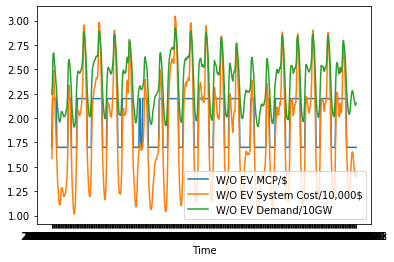

In [81]:
# pic of Without EV scenario
plt.figure()
plt.plot(resultWOEV['MCP'].iloc[0:480],label='W/O EV MCP/$')
plt.plot(resultWOEV['system_cost'].iloc[0:480] / (10000),label='W/O EV System Cost/10K$')
plt.plot(resultWOEV['supply'].iloc[0:480] / (10000),label='W/O EV Demand/10GW')
plt.xlabel('Time')
plt.legend()
plt.savefig('WithoutEV20days.png')

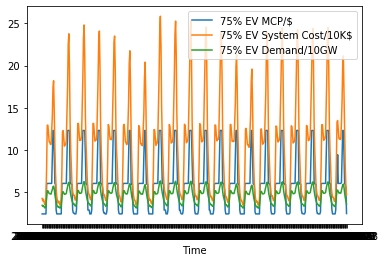

In [84]:
# pic of 75% EV scenario
plt.figure()
plt.plot(resultEV75['MCP'].iloc[0:480],label='75% EV MCP/$')
plt.plot(resultEV75['system_cost'].iloc[0:480] / (10000),label='75% EV System Cost/10K$')
plt.plot(resultEV75['supply'].iloc[0:480] / (10000),label='75% EV Demand/10GW')
plt.xlabel('Time')
plt.legend()
plt.savefig('75%EV20days.png')

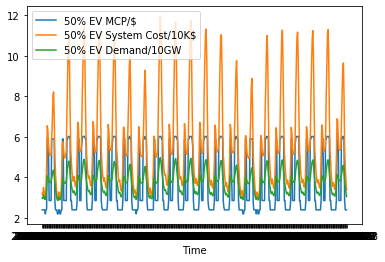

In [85]:
# pic of 50% EV scenario
plt.figure()
plt.plot(resultEV50['MCP'].iloc[0:480],label='50% EV MCP/$')
plt.plot(resultEV50['system_cost'].iloc[0:480] / (10000),label='50% EV System Cost/10K$')
plt.plot(resultEV50['supply'].iloc[0:480] / (10000),label='50% EV Demand/10GW')
plt.xlabel('Time')
plt.legend()
plt.savefig('50%EV20days.png')

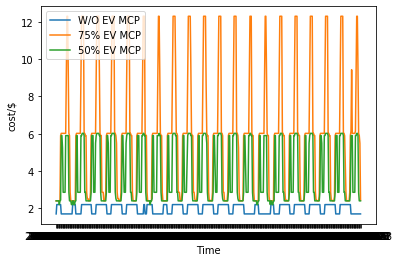

In [86]:
# pic of MCP
plt.figure()
plt.plot(resultWOEV['MCP'].iloc[0:480],label='W/O EV MCP')
plt.plot(resultEV75['MCP'].iloc[0:480],label='75% EV MCP')
plt.plot(resultEV50['MCP'].iloc[0:480],label='50% EV MCP')

plt.ylabel('cost/$')
plt.xlabel('Time')
plt.legend()
plt.savefig('MCP20days.png')

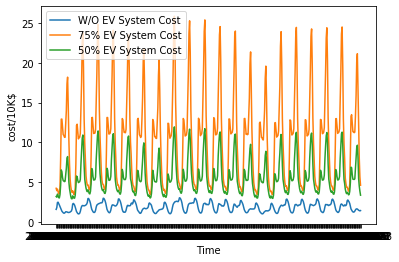

In [87]:
# pic of system cost
plt.figure()
plt.plot(resultWOEV['system_cost'].iloc[0:480] / (10000),label='W/O EV System Cost')
plt.plot(resultEV75['system_cost'].iloc[0:480] / (10000),label='75% EV System Cost')
plt.plot(resultEV50['system_cost'].iloc[0:480] / (10000),label='50% EV System Cost')
plt.ylabel('cost/10K$')
plt.xlabel('Time')
plt.legend()
plt.savefig('SystemCost20days.png')

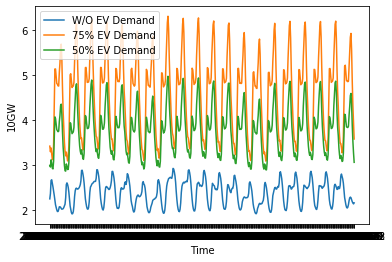

In [88]:
# pic of demand
plt.figure()
plt.plot(resultWOEV['supply'].iloc[0:480] / (10000),label='W/O EV Demand')
plt.plot(resultEV75['supply'].iloc[0:480] / (10000),label='75% EV Demand')
plt.plot(resultEV50['supply'].iloc[0:480] / (10000),label='50% EV Demand')
plt.ylabel('10GW')
plt.xlabel('Time')
plt.legend()
plt.savefig('Demand40days.png')